<a href="https://colab.research.google.com/github/santana-robledo/Juego_ahorcado/blob/main/Procesamiento%20d%C3%ADgital%20de%20Im%C3%A1genes/Practica_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from google.colab.patches import cv2_imshow

Filtro Sal y Pimienta

In [ ]:
def add_noise(img):
    row, col = img.shape
    number_of_pixels = random.randint(1000, 10000)
    for i in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        img[y_coord][x_coord] = 255

    number_of_pixels = random.randint(1000, 10000)
    for i in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        img[y_coord][x_coord] = 0
    return img

Carga de imágenes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
I1 = cv2.imread("/content/drive/MyDrive/Procesamiento digital de imágenes 2026A/Iron-Man.jpg")
I1 = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)

Mounted at /content/drive


Filtro de Suavizado

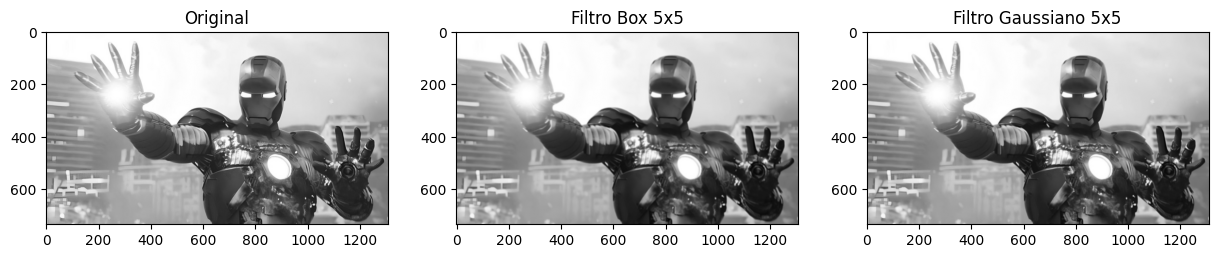

In [ ]:
# Filtro Box 5x5
n_box = 5
h_box = np.ones((n_box, n_box), np.float32)/(n_box * n_box)

# Filtro Gaussiano 5x5
h_gauss = np.matrix('1 4 6 4 1;4 16 24 16 4;6 24 36 24 6;4 16 24 16 4;1 4 6 4 1')
h_gauss = h_gauss * (1/256)

# Aplicar suavizado
I2_box = cv2.filter2D(I1, -1, h_box)
I2_gauss = cv2.filter2D(I1, -1, h_gauss)

# Mostrar resultados de suavizado
fig, ax = plt.subplots(1, 3, figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(I1, cmap="gray")
plt.title("Original")
plt.subplot(1,3,2)
plt.imshow(I2_box, cmap="gray")
plt.title("Filtro Box 5x5")
plt.subplot(1,3,3)
plt.imshow(I2_gauss, cmap="gray")
plt.title("Filtro Gaussiano 5x5")
plt.show()


Filtro Sobel

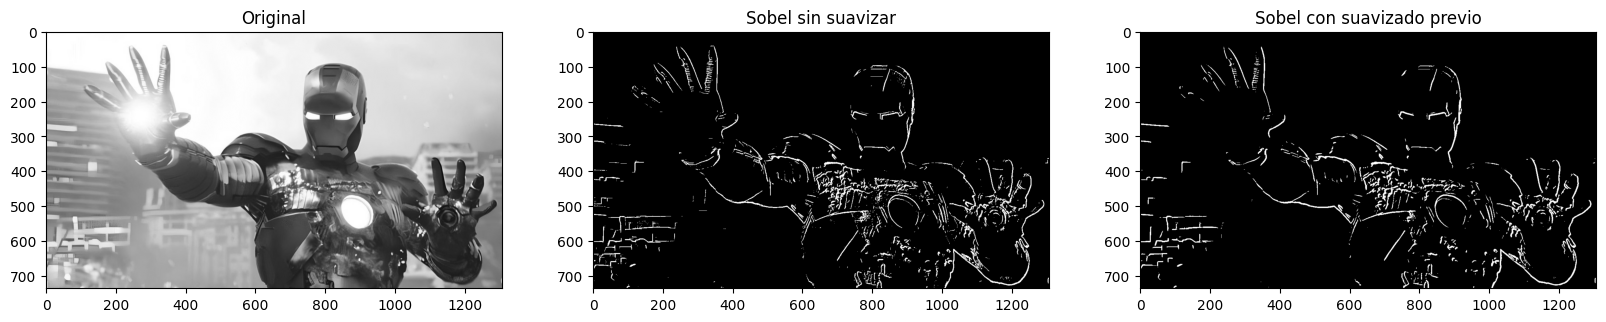

In [ ]:
# Filtro Box 3x3 para suavizado previo
n = 3
h = np.ones((n, n), np.float32)/(n*n)

# Filtros Sobel
hx = np.matrix('-1 0 1;-2 0 2;-1 0 1')
hy = np.matrix('-1 -2 -1;0 0 0;1 2 1')

# Aplicar suavizado
gray_suavizado = cv2.filter2D(I1, -1, h)

# Sin suavizar
sx = cv2.filter2D(I1, -1, hx)
sy = cv2.filter2D(I1, -1, hy)
s = cv2.addWeighted(sx, 0.5, sy, 0.5, 0)
s = cv2.inRange(s, 50, 255)

# Con suavizado
sx_suavizado = cv2.filter2D(gray_suavizado, -1, hx)
sy_suavizado = cv2.filter2D(gray_suavizado, -1, hy)
s_suavizado = cv2.addWeighted(sx_suavizado, 0.5, sy_suavizado, 0.5, 0)
s_suavizado = cv2.inRange(s_suavizado, 50, 255)

# Mostrar resultados Sobel
fig, ax = plt.subplots(1, 3, figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(I1, cmap="gray")
plt.title("Original")
plt.subplot(1,3,2)
plt.imshow(s, cmap="gray")
plt.title("Sobel sin suavizar")
plt.subplot(1,3,3)
plt.imshow(s_suavizado, cmap="gray")
plt.title("Sobel con suavizado previo")
plt.show()

FILTRO LAPLACE

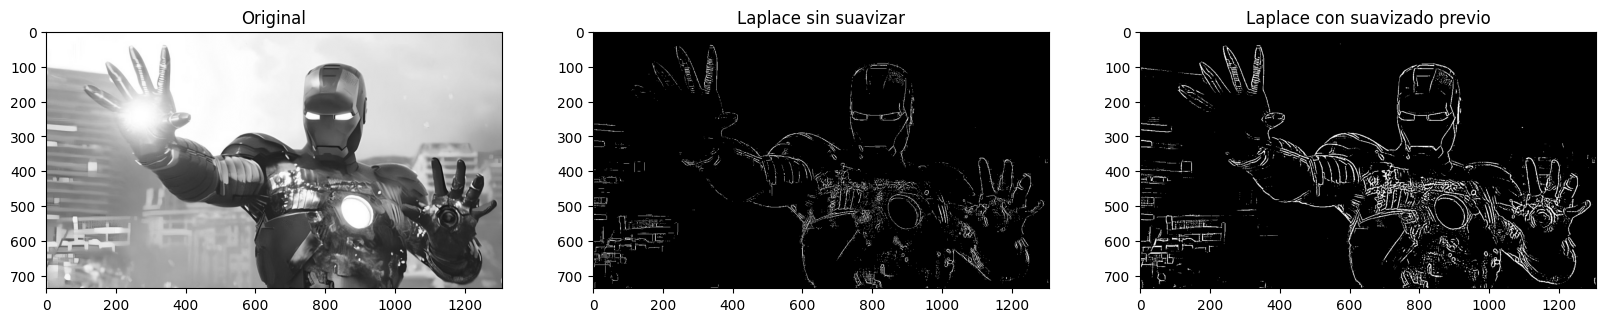

In [ ]:
# Filtro Laplace
hl = np.matrix('1 1 1; 1 -8 1; 1 1 1')

# Aplicar suavizado
gray_s = cv2.filter2D(I1, -1, h)

# Sin suavizar
dst = cv2.filter2D(I1, -1, hl)
dst = cv2.inRange(dst, 60, 255)

# Suavizada
dst_s = cv2.filter2D(gray_s, -1, hl)
dst_s = cv2.inRange(dst_s, 15, 255)

# Mostrar resultados Laplace
fig, ax = plt.subplots(1, 3, figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(I1, cmap='gray')
plt.title("Original")
plt.subplot(1,3,2)
plt.imshow(dst, cmap='gray')
plt.title("Laplace sin suavizar")
plt.subplot(1,3,3)
plt.imshow(dst_s, cmap='gray')
plt.title("Laplace con suavizado previo")
plt.show()

FILTRO DE LA MEDIANA CON RUIDO

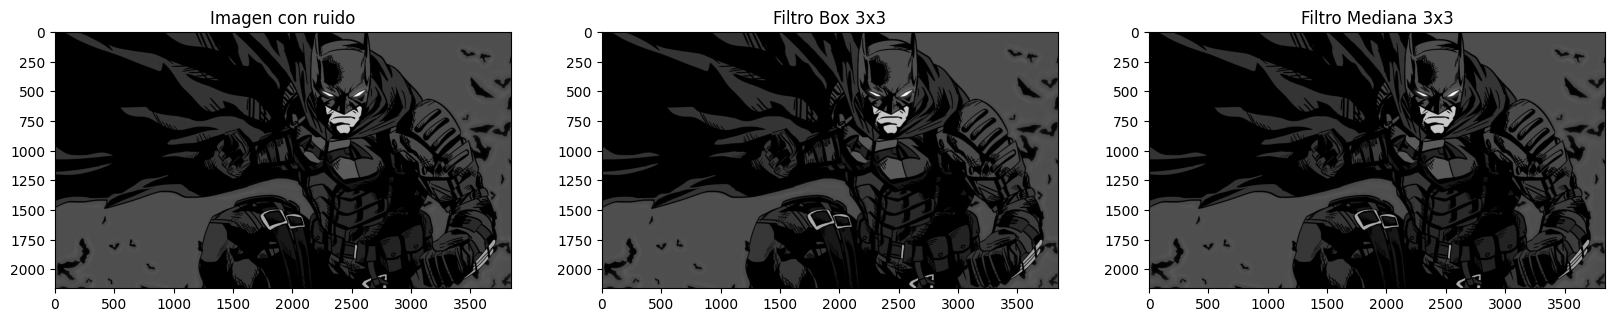

In [ ]:
# Cargar imagen nuevamente
I1 = cv2.imread('/content/drive/MyDrive/Procesamiento digital de imágenes 2026A/Batman.jpg')
gray = cv2.cvtColor(I1, cv2.COLOR_BGR2GRAY)

# Añadir ruido
ruido = add_noise(gray.copy())

# Filtro Box 3x3
n = 3
h = np.ones((n, n), np.float32)/(n*n)
ruido_box = cv2.filter2D(ruido, -1, h)

# Filtro de la mediana
dst_mediana = cv2.medianBlur(ruido, 3)

# Mostrar resultados
fig, ax = plt.subplots(1, 3, figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(ruido, cmap='gray')
plt.title("Imagen con ruido")
plt.subplot(1,3,2)
plt.imshow(ruido_box, cmap='gray')
plt.title("Filtro Box 3x3")
plt.subplot(1,3,3)
plt.imshow(dst_mediana, cmap='gray')
plt.title("Filtro Mediana 3x3")
plt.show()